## Load packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import scipy.stats as stats

In [2]:
antifungal = "Voriconazole"
molar_mass = 349.3
date = "2023-01-19"
organism = "Candida albicans"

## Import layout

In [3]:
#source_plate = '../growth_curve_files/plate.xlsx'
source_plate = r"plate_plan_vori_prise4.xlsx"
plate_df = pd.read_excel(source_plate, header=0, index_col=0)
plate_df.head(3)

,strain,conc
well,,
A1,ERG11-DOX C.a,0.01
B1,ERG11-DOX C.a,0.01
C1,ERG11-DOX C.a,0.10


In [4]:
#importation of excel output from the TECAN
source_table1 = r"voriconazole_prise4_CB_09-2022.xlsx"
source_df = pd.read_excel(source_table1, header=0, index_col=0)
source_df.head()

,0s,900s,1800s,2700s,3600s,4501s,5401s,6301s,7201s,8101s,...,163822s,164722s,165622s,166522s,167422s,168322s,169222s,170122s,171023s,171923s
A1,0.128620,0.128170,0.12818,0.12815,0.12832,0.128150,0.128450,0.128450,0.12865,0.12873,...,1.038000,1.03830,1.038400,1.03900,1.039200,1.03900,1.039600,1.040600,1.04130,1.040700
B1,0.130450,0.130300,0.13020,0.13003,0.12983,0.129950,0.129920,0.129950,0.13030,0.13045,...,1.129600,1.12920,1.129400,1.12940,1.130000,1.12950,1.130700,1.130500,1.13190,1.132700
C1,0.130230,0.130120,0.12998,0.12975,0.12965,0.129700,0.129670,0.129780,0.13020,0.13035,...,0.965570,0.96535,0.966020,0.96620,0.966800,0.96715,0.967250,0.968320,0.96908,0.969280
D1,0.130600,0.130530,0.13035,0.13005,0.12990,0.129900,0.129950,0.129920,0.13005,0.13035,...,0.943900,0.94312,0.942520,0.94443,0.944400,0.94620,0.946250,0.944080,0.94675,0.948000
E1,0.087575,0.087625,0.08745,0.08735,0.08710,0.087175,0.086925,0.086675,0.08665,0.08675,...,0.086775,0.08635,0.085675,0.08550,0.085425,0.08540,0.085575,0.086525,0.08710,0.087225


In [5]:
#conversion of timepoints (s) -> (h)
rename_dict = {}

for col_name in source_df.columns:
    to_hours = np.float64(col_name.strip('s'))/(60*60)
    rename_dict[col_name] = to_hours
    
source_df.rename(columns = rename_dict, inplace=True)

source_df.head()

,0.000000,0.250000,0.500000,0.750000,1.000000,1.250278,1.500278,1.750278,2.000278,2.250278,...,45.506111,45.756111,46.006111,46.256111,46.506111,46.756111,47.006111,47.256111,47.506389,47.756389
A1,0.128620,0.128170,0.12818,0.12815,0.12832,0.128150,0.128450,0.128450,0.12865,0.12873,...,1.038000,1.03830,1.038400,1.03900,1.039200,1.03900,1.039600,1.040600,1.04130,1.040700
B1,0.130450,0.130300,0.13020,0.13003,0.12983,0.129950,0.129920,0.129950,0.13030,0.13045,...,1.129600,1.12920,1.129400,1.12940,1.130000,1.12950,1.130700,1.130500,1.13190,1.132700
C1,0.130230,0.130120,0.12998,0.12975,0.12965,0.129700,0.129670,0.129780,0.13020,0.13035,...,0.965570,0.96535,0.966020,0.96620,0.966800,0.96715,0.967250,0.968320,0.96908,0.969280
D1,0.130600,0.130530,0.13035,0.13005,0.12990,0.129900,0.129950,0.129920,0.13005,0.13035,...,0.943900,0.94312,0.942520,0.94443,0.944400,0.94620,0.946250,0.944080,0.94675,0.948000
E1,0.087575,0.087625,0.08745,0.08735,0.08710,0.087175,0.086925,0.086675,0.08665,0.08675,...,0.086775,0.08635,0.085675,0.08550,0.085425,0.08540,0.085575,0.086525,0.08710,0.087225


## Reshape (wide to long)

In [6]:
longdf = source_df.reset_index().rename(columns = {'index' : 'well'})
longdf = longdf.melt(id_vars = ['well'], var_name = 'time (h)', value_name = 'OD')
longdf

,well,time (h),OD
0,A1,0.0,0.128620
1,B1,0.0,0.130450
2,C1,0.0,0.130230
3,D1,0.0,0.130600
4,E1,0.0,0.087575
...,...,...,...
18427,D12,47.756389,0.086425
18428,E12,47.756389,0.086450
18429,F12,47.756389,0.086300
18430,G12,47.756389,0.086100


## Annotate dataframe with layout

In [7]:
merged_df = longdf.merge(right=plate_df, on=['well'])
merged_df.head(5)

,well,time (h),OD,strain,conc
0,A1,0.0,0.12862,ERG11-DOX C.a,0.01
1,A1,0.25,0.12817,ERG11-DOX C.a,0.01
2,A1,0.5,0.12818,ERG11-DOX C.a,0.01
3,A1,0.75,0.12815,ERG11-DOX C.a,0.01
4,A1,1.0,0.12832,ERG11-DOX C.a,0.01


## Visualization (example)

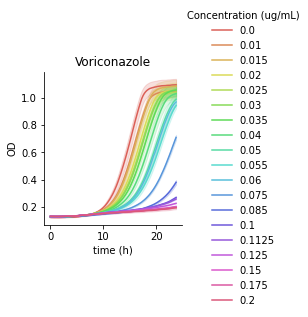

In [8]:
grid = sns.FacetGrid(data=merged_df[merged_df['time (h)'] <=24], hue='conc', palette='hls')
grid.map(sns.lineplot, 'time (h)', 'OD')
#grid.set_titles(col_template='{col_name}')
grid.set_axis_labels('time (h)', 'OD')
grid.add_legend(title = 'Concentration (ug/mL)')
grid.fig.subplots_adjust(top=0.9)
plt.title(antifungal)
axes = grid.axes.flatten()
title = "GC_" + antifungal + "_" + organism + "_" + date
plt.savefig(title, format='png', dpi=300)
#plt.savefig('../growth_curve_files/graphs/mica_40h.png', format='png', dpi=300)

## Calculate area under the curve (AUC)

In [8]:
def get_auc(g):
    return np.trapz(g.OD)

In [9]:
aucdf = merged_df[merged_df['time (h)'] <= 24].groupby('well')[['OD']].apply(func=get_auc).reset_index(name='auc')
condensed_df = plate_df.merge(right=aucdf, on=['well'])
condensed_df.head(3)

,well,strain,conc,auc
0,A1,ERG11-DOX C.a,0.01,42.348570
1,B1,ERG11-DOX C.a,0.01,46.130415
2,C1,ERG11-DOX C.a,0.10,16.172145


## Calculate derivative growth rate (DGR)

In [10]:
def get_derivative_growth_rate(g):
    # rate is multiplied by 4 to convert from /15min (measurements every 15 min) to /h
    data_diff = g.OD.diff()*4
    get_top_5 = data_diff.nlargest(5)    
    growth_rate = np.median(get_top_5)
    return growth_rate

In [11]:
dgr = merged_df[merged_df['time (h)'] <= 24].groupby('well')[['OD']].apply(func=get_derivative_growth_rate).reset_index(name='dgr')
condensed_df = plate_df.merge(right=dgr, on=['well'])
condensed_df.head(3)

,well,strain,conc,dgr
0,A1,ERG11-DOX C.a,0.01,0.13480
1,B1,ERG11-DOX C.a,0.01,0.14136
2,C1,ERG11-DOX C.a,0.10,0.02376


## Convert concentrations (ug/mL -> uM)

In [12]:
def convert_to_uM(ug, mass_mol):
    # a simple function to convert ug/ml to uM with the molecular weigth of the compound
    vol = 0.001
    uM = (((ug*10**-6)/(vol*mass_mol))*10**6)
    return uM

In [13]:

condensed_df['concentration_uM'] = condensed_df['conc'].apply(lambda x: convert_to_uM(x, molar_mass))
condensed_df

,well,strain,conc,dgr,concentration_uM
0,A1,ERG11-DOX C.a,0.0100,0.13480,0.028629
1,B1,ERG11-DOX C.a,0.0100,0.14136,0.028629
2,C1,ERG11-DOX C.a,0.1000,0.02376,0.286287
3,D1,ERG11-DOX C.a,0.1000,0.02156,0.286287
4,A2,ERG11-DOX C.a,0.0150,0.13660,0.042943
5,B2,ERG11-DOX C.a,0.0150,0.14240,0.042943
6,C2,ERG11-DOX C.a,0.1125,0.01988,0.322073
7,D2,ERG11-DOX C.a,0.1125,0.01688,0.322073
8,A3,ERG11-DOX C.a,0.0200,0.13112,0.057257
9,B3,ERG11-DOX C.a,0.0200,0.13712,0.057257


## Convert concentrations (uM -> ug/mL)

In [14]:
def convert_to_ug(uM, mass_mol):
    # a simple function to convert uM to ug/ml with the molecular weigth of the compound
    ug = (uM*mass_mol)/1000
    return ug

## Calculate inhibition coefficient

In [15]:
# Setting the value to be used to calculate the inhibition coefficient
# Either derivative growth rate (fitness_type = 'dgr')
# or normalized AUC parameter (fitness_type = 'norm_auc')
if 'dgr' in condensed_df.columns.tolist():
    fitness_type = 'dgr'
elif 'auc' in condensed_df.columns.tolist():
    fitness_type = 'norm_auc'
else:
    print('Fitness has not been calculated')

In [16]:
def get_inhib_coeff(df, fitness, fitness_type):
    # Inhibition coefficient is calculated either from the derivative growth rate (fitness_type = 'dgr')
    # or the normalized AUC parameter (fitness_type = 'norm_auc')
    ref = df.loc[(df.concentration_uM==0), 'dgr'].mean()
    return (ref - fitness)/ref

In [17]:
condensed_df['inhib_coeff'] = condensed_df['dgr'].apply(lambda x: get_inhib_coeff(condensed_df, x, 'dgr'))
condensed_df.head(3)

,well,strain,conc,dgr,concentration_uM,inhib_coeff
0,A1,ERG11-DOX C.a,0.01,0.13480,0.028629,0.099171
1,B1,ERG11-DOX C.a,0.01,0.14136,0.028629,0.055333
2,C1,ERG11-DOX C.a,0.10,0.02376,0.286287,0.841219


## Hill equation + fitting

In [18]:
#fit_data = condensed_df[(condensed_df.strain=='LL13-040') & (condensed_df.genotype=='WT') & (condensed_df.concentration_uM!=0) & (condensed_df.concentration_uM<50)][['concentration_uM','replicate','inhib_coeff']]
fit_data = condensed_df[(condensed_df.concentration_uM!=0)].groupby(['concentration_uM'])[['inhib_coeff']].mean().reset_index()
fit_data

,concentration_uM,inhib_coeff
0,0.028629,0.077252
1,0.042943,0.067763
2,0.057257,0.103716
3,0.071572,0.138867
4,0.085886,0.131115
5,0.100200,0.149960
6,0.114515,0.159316
7,0.143143,0.206629
8,0.157458,0.239107
9,0.171772,0.198476


In [19]:
wt_conc = fit_data.concentration_uM.values
wt_inhib = fit_data.inhib_coeff.values

In [20]:
print(wt_conc)
print(wt_inhib)

[0.02862869 0.04294303 0.05725737 0.07157171 0.08588606 0.1002004
 0.11451474 0.14314343 0.15745777 0.17177212 0.21471514 0.24334383
 0.28628686 0.32207272 0.35785857 0.42943029 0.501002   0.57257372]
[0.07725207 0.06776263 0.10371558 0.13886661 0.13111468 0.1499599
 0.15931569 0.20662924 0.23910719 0.19847634 0.30045442 0.62670409
 0.8485699  0.87717188 0.93197006 0.95535953 0.95936915 0.95856723]


In [21]:
def hill_equation(x, E, n):
    # this function defines the hill equation, where:
    # x is the drug concentration
    # E is the concentration with half effect (IC50)
    # n is the hill coefficient,
    
    return 1/(1+((E/x)**n))

In [22]:
import scipy as sci

# Get best fit parameters (popt) and covariance matrix (pcov)
popt, pcov = sci.optimize.curve_fit(hill_equation, wt_conc, wt_inhib, p0=[0.5,4])
print(popt)
print(pcov)

[0.21794859 3.98906758]
[[8.33278988e-05 8.35025761e-05]
 [8.35025761e-05 3.31650612e-01]]


In [23]:
def get_IC(v, E, n):
    # This function calculates ICv based on IC50 (E) and hill coefficient (n) for any v value between 0 and 1
    return E*((v/(1-v))**(1/n))

In [24]:
ic50_mol = round(get_IC(0.5,popt[0],popt[1]),2)
#This value should be equal to popt[0]
print('IC50 = {} uM'.format(ic50_mol))
ic75_mol = round(get_IC(0.75,popt[0],popt[1]),2)
print('IC75 = {} uM'.format(ic75_mol))

IC50 = 0.22 uM
IC75 = 0.29 uM


In [25]:
def convert_to_ug(uM, mass_mol):
    # a simple function to convert uM to ug/ml with the molecular weigth of the compound
    ug = (uM*mass_mol)/1000
    return ug

In [26]:
ic50 = convert_to_ug(ic50_mol, molar_mass)
ic50

0.076846

In [27]:
dof = np.size(wt_inhib) - 1 # degrees of freedom:
# calculate student-t value
a = 0.05 #(1-0.95, 95% CI)
tval = stats.t.ppf(1.0-a/2, dof)
ci_cy = tval*np.sqrt(pcov)[0]
# this little snippet of code allows to calculate the 95% confidence interval on both parameters.
# based on this, we would have IC50 = 9.26 uM +/- 1.18 and hill_coeff = 0.749 +/- 0.019

ci_cy

array([0.01925927, 0.01927944])

In [28]:
interval = convert_to_ug(ci_cy[0], molar_mass)
interval

0.006727261283043615

In [29]:
# now we'll want to plot our curve on top of the data. However, since we'll be plotting on both linear and log
# axis, we need to choose x coordinates across our range of concentrations that are not log-distributed and not 
# linearly distributed
fit_vals = np.logspace(np.log2(wt_conc.min()),np.log2(wt_conc.max()), num=50, base=2)

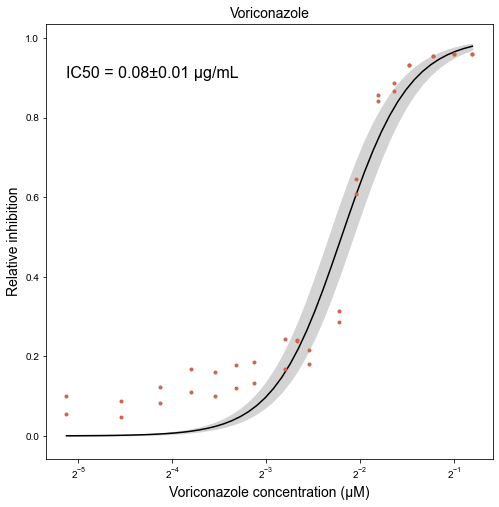

In [36]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(8,8))


plt.plot(condensed_df['concentration_uM'],condensed_df['inhib_coeff'], color='#CF6448', 
         marker='o', ms=3, linestyle='None', zorder=9)

plt.plot(fit_vals, [hill_equation(x,popt[0], popt[1]) for x in fit_vals], 'k')


plt.fill_between(fit_vals, [hill_equation(x,popt[0]+ci_cy[0], popt[1]-ci_cy[1]) for x in fit_vals],
                 [hill_equation(x,popt[0]-ci_cy[0], popt[1]+ci_cy[1]) for x in fit_vals], color='lightgrey')

plt.xscale('log',base=2)

text = "IC50 = " + str(round(ic50,2)) + "\u00B1" + str(round(interval,2)) +" μg/mL"
#text = "\nou " + str(round(ic50_mol,2)) + "\u00B1" + str(round(ci_cy[0],2)) + " $\mu$M\n" + "\nCoefficient de Hill = " + str(round(popt[1],2)) + "\u00B1" + str(round(ci_cy[1],2))+ "\n\nBasé sur le\ntaux de croissance dérivé\naprès 24h"
plt.text(wt_conc.min(), 0.9, text, fontsize=16) 

plt.xlabel(antifungal + " concentration (μM)", fontsize=14)
plt.ylabel('Relative inhibition', fontsize=14)
plt.title(antifungal, fontsize=14)

plt.rcParams['svg.fonttype'] = 'none'
name = "Dose-response_curve_" + antifungal + "_"+ organism + "24H" + "_" + date
plt.savefig(f"c:{name}.png", format='png', dpi=300)
plt.savefig(f"c:{name}.svg", format='svg', dpi=300)